## This notebook is about scikit-learn libraries

In [97]:
#Importing modules/libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error,accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

%matplotlib inline
plt.style.use('dark_background')

## Machine learning is the process of teaching a computer system on how to make accurate predictions from the data it is fed.  - Wikipedia

In Machine learning, the model/algorithm has been taught how to perform certain tasks with a huge amount of data. So that whenever the model/algorithm finds a pattern similar to what it is trained on, it performs tasks automatically without external intervention.

Thera are 2 main types of Machine Learning.
1. Supervised learning
2. Unsupervised learning

Supervised learning - Algorithm is trained on a labeled dataset.
Supervised learning is classified into two types - Classification and Regression.

Classification - The samples may belong to two or more classes. Learning from labeled data is key to predict the class of unlabeled data.

Regression - The desired output consists of one or more continous variables.

Scikit-learn is a Python module for machine learning built on top of SciPy. Scikit-learn is used for machine learning such as classification, regression, and clustering algorithms and it works with Python libraries like NumPy and SciPy.

## Linear Regression model

Linear regression model finds relationship between one or more features and continuous target variable and it performs regression task. 
I'm using Diabetes dataset to explore it using Scikit-learn.

The dataset can also be obtained from [here](https://github.com/plotly/datasets/blob/master/diabetes.csv)





In [98]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset

In [99]:
# Load dataset from scikit-learn dataset library

diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [100]:
print(diabetes.data.shape)

(442, 10)


In [101]:
print(diabetes.target.shape)

(442,)


In [102]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [103]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [104]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [105]:
#adding target to features in dataset
df['target_f'] = diabetes.target #new column name 'target_f'
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target_f
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [106]:
#checking for missing values
df.isnull().sum()
df.isna().sum()

age         0
sex         0
bmi         0
bp          0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
target_f    0
dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       442 non-null    float64
 1   sex       442 non-null    float64
 2   bmi       442 non-null    float64
 3   bp        442 non-null    float64
 4   s1        442 non-null    float64
 5   s2        442 non-null    float64
 6   s3        442 non-null    float64
 7   s4        442 non-null    float64
 8   s5        442 non-null    float64
 9   s6        442 non-null    float64
 10  target_f  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [108]:
#independent variables, drop data by column.
X = df.drop(labels='target_f', axis=1)  
#dependent variable
y = df['target_f']

Diabetes dataset consists of a total of 422 samples with 10 features each.
The dataset can be split into the test and train sets using train_test_split function of sklearn.model_selection package.

## Splitting the data

In [109]:
#splitting the dataset into 75%-25% train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 10)
(111, 10)
(331,)
(111,)


As the training model is complete, for predictions, train set which is not visible by the model and see how accurate our model predicts.

In [110]:
# Import Linear regression module from scikit-learn linear-model package
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# To train the model
lr.fit(X_train, y_train)

LinearRegression()

<AxesSubplot:xlabel='Predicted Value', ylabel='Actual value'>

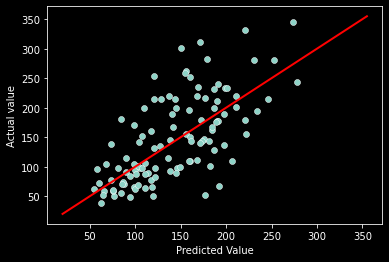

In [111]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.xlabel("Predicted Value")
plt.ylabel("Actual value")
plt.plot([20,355],[20,355],color="red",linewidth=2)
predicted_y = lr.predict(X_test)
# scatterplot showing spread of data
sns.scatterplot(predicted_y,y_test)

In [112]:
print("coefficients : {}\n".format(lr.coef_)) # coefficients of the linear regression model for each feature
print("Mean Squared error : {:.2f}\n".format(mean_squared_error(y_test,predicted_y))) # mean squared error
print("r-squared : {:.2f}\n ".format(r2_score(y_test,predicted_y))) # coefficient of determination

coefficients : [  -7.85951708 -245.05253542  575.11667591  323.85372717 -519.77447335
  250.61132753    0.96367294  180.50891964  614.75959394   52.10619986]

Mean Squared error : 2903.10

r-squared : 0.44
 


## Random Forrest Classfication

## Red Wine Quality Data Set

 This dataset is available at [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)
 The dataset contains a total of 12 variables. The purpose of the red wine quality dataset is to predict which of the physiochemical features make good wine. The dataset contains the following features.
 
 1. Alcohol: Amount of Alcohol in wine
 2. pH: level of acidity
 3. Volatile acidity: High acetic acid content which leading to an unpleasant vinegar taste
 4. Fixed Acidity: non-volatile acids that do not evaporate easily
 5. Citric Acid: 
 6. Sulphates
 7. Density
 8. Residual sugar
 9. Chlorides
 10. Free Sulfur Dioxide
 11. Total Sulfur Dioxide
 12. Quality
 
 

In [113]:
wine_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df_wine = pd.read_csv(wine_url, sep=';')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [114]:
df_wine.shape

(1599, 12)

#### Checking for null values if there is any

In [115]:
df_wine.info()
df_wine.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [116]:
#descriptive statistics
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The value of density from the above description is almost similar throughout the dataset because mean, min, 25%, 50%, 75% are all ~0.99. Dropping density feature will not have much significance predicting in quality of wine.

In [117]:
df_wine.drop(labels='density', axis=1, inplace=True) #dropped 'density' column

In [118]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [119]:
df_wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [120]:
df_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [121]:
df_wine['quality'].count()

1599

## Checking for Outliers

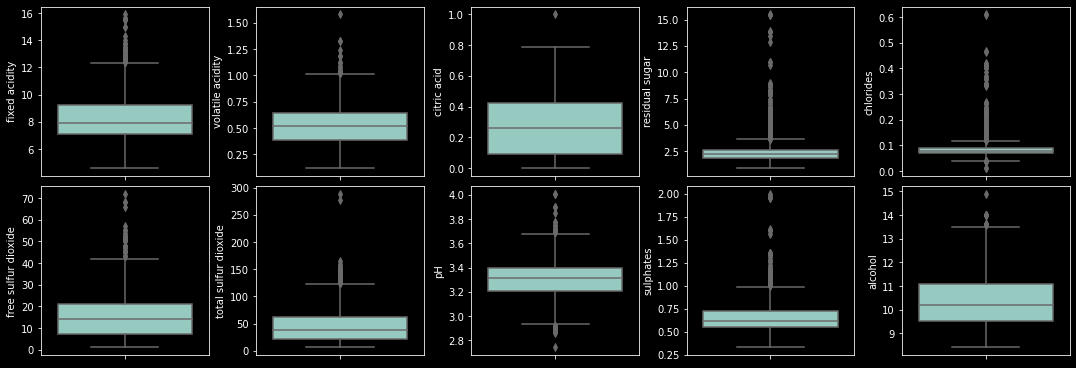

In [122]:
#Plotting boxplots to see if there are any outliers in our data (considering data betwen 25th and 75th percentile as non outlier)
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for col in df_wine.columns:
  if col != 'quality':
    sns.boxplot(y=col, data=df_wine, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.4)

Clearly there are outliers in all columns/features

Using bar plots to see if there is any relation between each independent feature with dependent feature('Qualtiy')

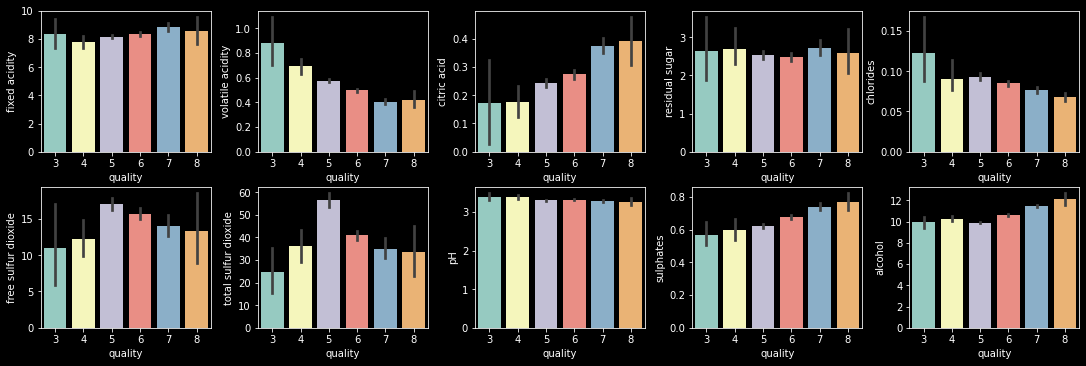

In [123]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index=0
for col in df_wine.columns:
  if col != 'quality':
    sns.barplot(x='quality', y=col, data=df_wine, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)

### The above visualiation shows that Quality increases with

* decrease in volatile acidity
* increase in citric acid.
* decrease in chlorides.
* decrease in pH.
* increase in sulphates.
* increase in alcohol

<AxesSubplot:xlabel='quality', ylabel='count'>

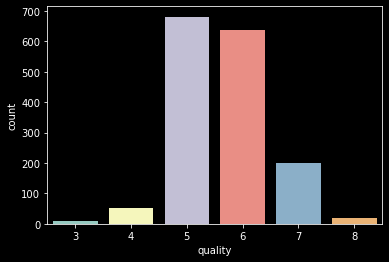

In [124]:
sns.countplot(x='quality', data=df_wine)

<AxesSubplot:>

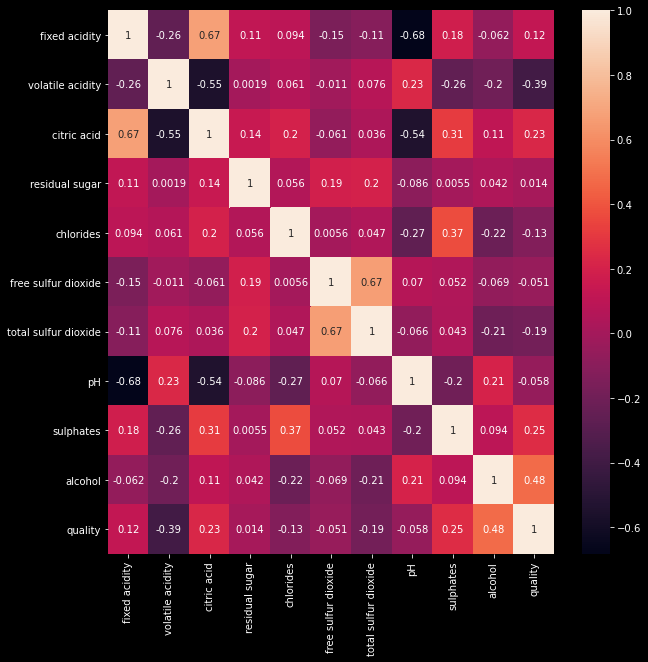

In [125]:
plt.figure(figsize=(10,10))
sns.heatmap(df_wine.corr(),annot=True)

### Following are the observations from the above plots.

1. Volatile acidity, chlorides and ph are negatively correlated to quality — hence quality increases with decrease in value of these features and vice versa for other features.
2. Free sulfur dioxide and total sulfur dioxide are highly correlated to each other with correlation of 0.67.
3. There are many features with correlation < 0.5 to quality, and may be removed from the dataset.

In [126]:
#Dividing quality of wine in two buckets - Good wine and Bad wine

bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df_wine['quality'] = pd.cut(df_wine['quality'], bins = bins, labels = group_names)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,bad


In [127]:
#Map the values of bad and good to 0 and 1
df_wine['quality'] = df_wine['quality'].map({'bad' : 0, 'good' : 1})
df_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,3.35,0.80,10.5,0


0    1382
1     217
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

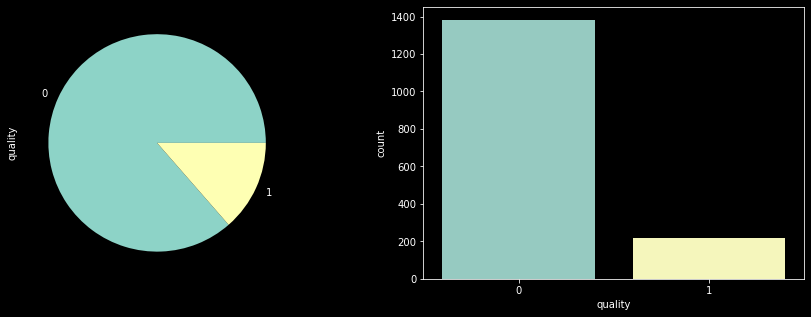

In [128]:
#Count and visualise number of different wine samples
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
print(df_wine['quality'].value_counts())
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
ax = ax.flatten()
df_wine['quality'].value_counts().plot(x=0, y=1, kind='pie', figsize=(15,5), ax=ax[0])
sns.countplot(df_wine['quality'], ax=ax[1])

### Splitting the data

In [129]:
#Creating set of independent and dependent features
X = df_wine.iloc[:, :-1]
Y = (df_wine.iloc[:, 10])
 
#Creating training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
 
#Feature scaling, but not scaling dependent variable as it has categorical data
from sklearn.preprocessing import StandardScaler as ss
SS = ss()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

## Random Forest Classifier

In [130]:
# Training the model
rfc = RandomForestClassifier(n_estimators=25, criterion='gini', random_state=0,)
rfc.fit(X_train, Y_train)

# Making predictions
Y_pred_rfc = rfc.predict(X_test)
Y_compare_rfc = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred_rfc})
print(Y_compare_rfc.head())
print('\nConfussion matrix:')
print(confusion_matrix(Y_test, Y_pred_rfc))

     Actual  Predicted
1109      0          0
1032      0          0
1002      1          1
487       0          0
979       0          0

Confussion matrix:
[[283   7]
 [  9  21]]


## Model Score

In [131]:
from sklearn.model_selection import cross_val_score
modelName = 'Random Forrest'
modelClassifier = rfc
models = pd.DataFrame({'modelName' : modelName, 'modelClassifier' : modelClassifier})
score=[]
accuracy = cross_val_score(rfc, X_train, Y_train, scoring='accuracy', cv=10)
print('Accuracy of Random Forrest Classification model is %.2f' %(accuracy.mean()))
score.append(accuracy.mean())

Accuracy of Random Forrest Classification model is 0.90


Random Forest Classifictions gives excellent accuracy to predict the quality of wine and can be considered a good model

## KNN(K- Nearest Neighbour) Algorithm

In [132]:
from sklearn.datasets import load_iris

df_iris=load_iris()#here the data we have downloaded from load_iris is in the form of dictonaries means have keys and values
print(df_iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [133]:
print(df_iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Checking the 'target' key

In [134]:
print(df_iris['target_names'])

['setosa' 'versicolor' 'virginica']


The feature names are:

In [135]:
print(df_iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [136]:
print((df_iris['data'].shape))

(150, 4)


In [137]:
# Printing first 5 samples
df_iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [138]:
print((df_iris['target'].shape))

(150,)


### Splitting the data

In [139]:
X_train,X_test,y_train,y_test=train_test_split(
    df_iris['data'],df_iris['target'],random_state=0
)

In [140]:
print("X_train shape:{}".format(X_train.shape))
print("y_train shape:{}".format(y_train.shape))
print("X_test shape:{}".format(X_test.shape))
print("X_test shape:{}".format(X_test.shape))

X_train shape:(112, 4)
y_train shape:(112,)
X_test shape:(38, 4)
X_test shape:(38, 4)


### KNN model

In [141]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
#train the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [145]:
X_new=np.array([[5,2.9,1,0.2]])
prediction=knn.predict(X_new)
print("X_new shape:{}".format(X_new.shape))
print("Prediction target name", df_iris['target_names'][prediction])

X_new shape:(1, 4)
Prediction target name ['setosa']


#### Evaluating the model

In [147]:
y_pred=knn.predict(X_test)
print("Test set score:{}".format(np.mean(y_pred==y_test)))

Test set score:0.9736842105263158


# References

1. [K-Nearest Neighbors Algorithm in Python and Scikit-Learn](https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/)

2. [Mastering Markdown](https://guides.github.com/features/mastering-markdown/)

3. [Useful Jupyter Notebook Shortcuts](https://www.earthdatascience.org/courses/intro-to-earth-data-science/open-reproducible-science/jupyter-python/jupyter-notebook-shortcuts/)